# Data Mining Project Spring 2022

Husam Irhimeh 20170592  

Heba Najdawi 20190959

Hamzah Hmaidan 20190271

Sara Mohammad 20190500

In [89]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from matplotlib.cbook import boxplot_stats
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from sklearn import svm
from sklearn import metrics
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor

In [90]:
df=pd.read_csv('/content/waterQuality1.csv')
df.head(10)

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
5,0.94,14.47,0.03,2.88,0.003,0.80,0.43,1.38,0.11,0.67,...,0.135,9.75,1.89,0.006,27.17,5.42,0.08,0.19,0.02,1
6,2.36,5.6,0.01,1.35,0.004,1.28,0.62,1.88,0.33,0.13,...,0.021,18.60,1.78,0.007,45.34,2.84,0.10,0.24,0.08,0
7,3.93,19.87,0.04,0.66,0.001,6.22,0.10,1.86,0.86,0.16,...,0.197,13.65,1.81,0.001,53.35,7.24,0.08,0.08,0.07,0
8,0.60,24.58,0.01,0.71,0.005,3.14,0.77,1.45,0.98,0.35,...,0.167,14.66,1.84,0.004,23.43,4.99,0.08,0.25,0.08,1
9,0.22,16.76,0.02,1.37,0.007,6.40,0.49,0.82,1.24,0.83,...,0.109,4.79,1.46,0.010,30.42,0.08,0.03,0.31,0.01,1


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [92]:
df.describe()

,aluminium,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
count,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000
mean,0.666158,0.161445,1.567715,0.042806,2.176831,0.247226,0.805857,0.771565,0.319665,0.328583,0.099450,9.818822,1.329961,0.005194,16.460299,2.920548,0.049685,0.147781,0.044673
std,1.265145,0.252590,1.216091,0.036049,2.567027,0.270640,0.653539,0.435373,0.329485,0.378096,0.058172,5.541331,0.573219,0.002967,17.687474,2.323009,0.028770,0.143551,0.026904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.405000,0.000000,0.002000,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000
50%,0.070000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,0.008000,0.102000,9.930000,1.420000,0.005000,7.740000,2.410000,0.050000,0.080000,0.050000
75%,0.280000,0.100000,2.480000,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,0.700000,0.151000,14.610000,1.760000,0.008000,29.480000,4.670000,0.070000,0.240000,0.070000
max,5.050000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,1.000000,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000


In [93]:
#check nulls
df.isna().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

In [94]:
#check duplicates
df.duplicated().sum()

0

In [95]:
#Show the dataframe columns 
df.columns

Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium', 'is_safe'],
      dtype='object')

In [96]:
df.dtypes

aluminium      float64
ammonia         object
arsenic        float64
barium         float64
cadmium        float64
chloramine     float64
chromium       float64
copper         float64
flouride       float64
bacteria       float64
viruses        float64
lead           float64
nitrates       float64
nitrites       float64
mercury        float64
perchlorate    float64
radium         float64
selenium       float64
silver         float64
uranium        float64
is_safe         object
dtype: object

In [97]:
#we wanted to change the (ammonia) type from string to float but 3 values were (#Num!) so we changed them to zero
df.iloc[7551:7552 , 1:2]=0
df.iloc[7568:7569 , 1:2]=0
df.iloc[7890:7891 , 1:2]=0
df["ammonia"] = pd.to_numeric(df["ammonia"], downcast="float")
print(df.dtypes)

aluminium      float64
ammonia        float32
arsenic        float64
barium         float64
cadmium        float64
chloramine     float64
chromium       float64
copper         float64
flouride       float64
bacteria       float64
viruses        float64
lead           float64
nitrates       float64
nitrites       float64
mercury        float64
perchlorate    float64
radium         float64
selenium       float64
silver         float64
uranium        float64
is_safe         object
dtype: object


In [98]:
#we wanted to change the (is_safe) type from string to float but 3 values were (#Num!) so we changed them to zero
df.iloc[7551:7552 , 20:]=0
df.iloc[7568:7569 , 20:]=0
df.iloc[7890:7891 , 20:]=0
df["is_safe"] = pd.to_numeric(df["is_safe"], downcast="float")
print(df.dtypes)

aluminium      float64
ammonia        float32
arsenic        float64
barium         float64
cadmium        float64
chloramine     float64
chromium       float64
copper         float64
flouride       float64
bacteria       float64
viruses        float64
lead           float64
nitrates       float64
nitrites       float64
mercury        float64
perchlorate    float64
radium         float64
selenium       float64
silver         float64
uranium        float64
is_safe        float32
dtype: object


In [99]:
df.describe()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
count,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,...,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000
mean,0.666158,14.272848,0.161445,1.567715,0.042806,2.176831,0.247226,0.805857,0.771565,0.319665,...,0.099450,9.818822,1.329961,0.005194,16.460299,2.920548,0.049685,0.147781,0.044673,0.114014
std,1.265145,8.881563,0.252590,1.216091,0.036049,2.567027,0.270640,0.653539,0.435373,0.329485,...,0.058172,5.541331,0.573219,0.002967,17.687474,2.323009,0.028770,0.143551,0.026904,0.317851
min,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,6.560000,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.405000,0.000000,...,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000,0.000000
50%,0.070000,14.130000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,...,0.102000,9.930000,1.420000,0.005000,7.740000,2.410000,0.050000,0.080000,0.050000,0.000000
75%,0.280000,22.129999,0.100000,2.480000,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,...,0.151000,14.610000,1.760000,0.008000,29.480000,4.670000,0.070000,0.240000,0.070000,0.000000
max,5.050000,29.840000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,...,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000,1.000000


In [100]:
def check_outliers(df, col):
  if(is_numeric_dtype(df[col])):
    print(f"Max value in '{col}' column: {max(df[col])}")
    print(f"Min value in '{col}' column: {min(df[col])}")
    
    outliers = [y for stat in boxplot_stats(df[col]) for y in stat['fliers']]
    outliers.sort()
    
    fig, axs = plt.subplots(ncols=2, figsize=(10,5))
    sns.histplot(df[col], color="red", label="100% Equities", kde=True, stat="density", linewidth=0, ax = axs[0])
    sns.boxplot(x = df[col], ax = axs[1])
    axs[1].text(0, -0.53, "Potential outliers:   " + ", ".join([str(item) for item in outliers]))

    #Hampel Filter
    lower = df[col].median() - 3 * df[col].mad()
    upper = df[col].median() + 3 * df[col].mad()
    outlier_indices = np.where((df[col]<lower) | (df[col]>upper))[0]
    print("====================================================================")
    print("Values of the potential outliers -Using Hample Filter: ")
    out_val = df.iloc[outlier_indices,:][col].copy().sort_values()
    print(out_val)
    print("====================================================================")

Max value in 'ammonia' column: 29.84000015258789
Min value in 'ammonia' column: -0.07999999821186066
Values of the potential outliers -Using Hample Filter: 
Series([], Name: ammonia, dtype: float32)


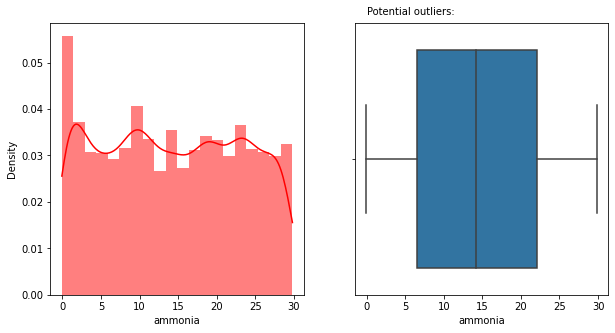

In [101]:
check_outliers(df, "ammonia")

In [102]:
#we applied it on this column as an example and because the dataframe is big and it'll take alot of time to apply it on the whole dataframe and because it the column we had the most problems with.
#some values in the (ammonia) column were negative but it can't be negative because if it doesn't have ammonia the value will be 0 not negative.
df['ammonia']= np.where(df['ammonia'] < 0,0, df['ammonia'])

Max value in 'ammonia' column: 29.84000015258789
Min value in 'ammonia' column: 0.0
Values of the potential outliers -Using Hample Filter: 
Series([], Name: ammonia, dtype: float32)


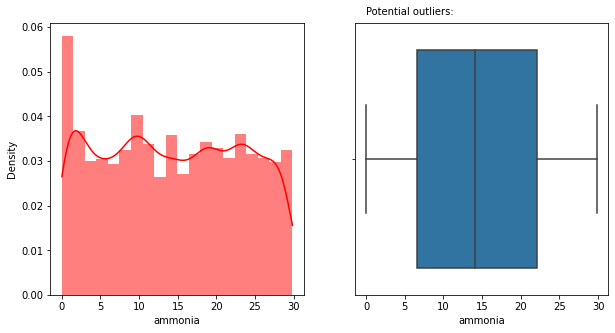

In [103]:
check_outliers(df, "ammonia")

In [104]:
#Save the cleaned dataframe
#df.to_csv('cleaned_df.csv',index=True)
#from google.colab import files
#files.download("cleaned_df.csv")

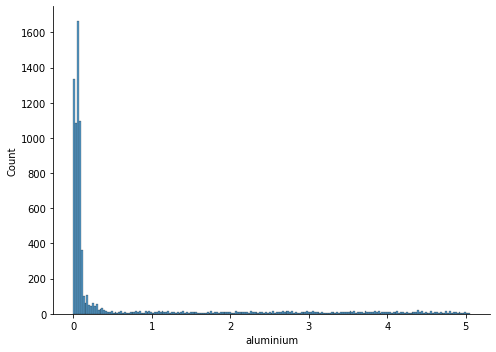

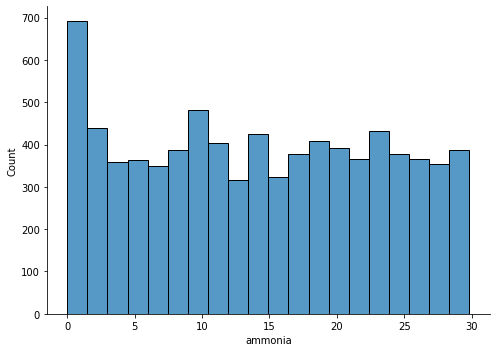

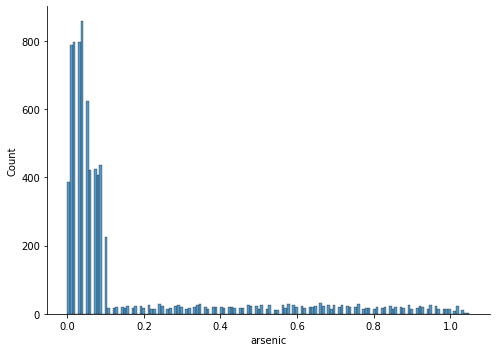

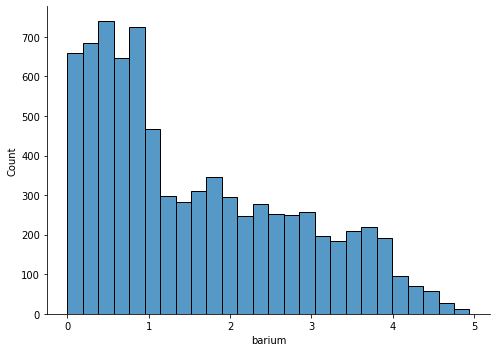

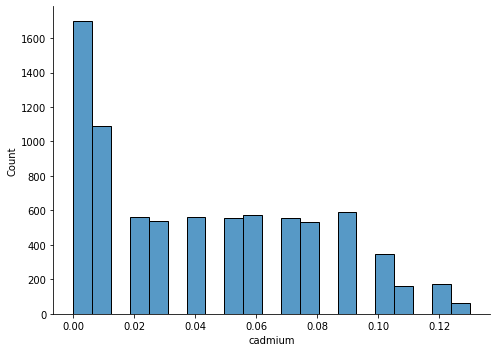

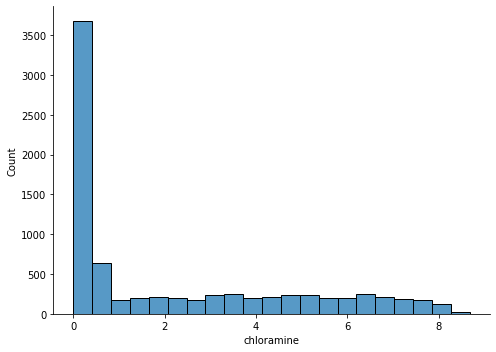

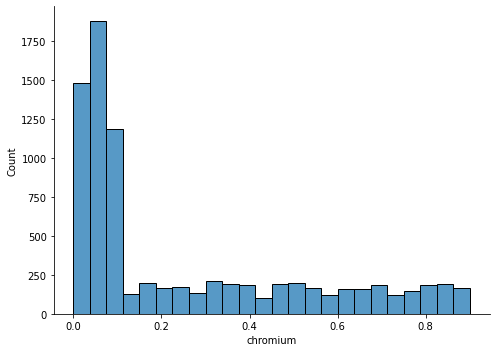

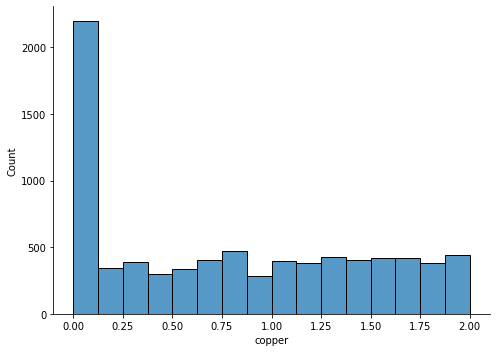

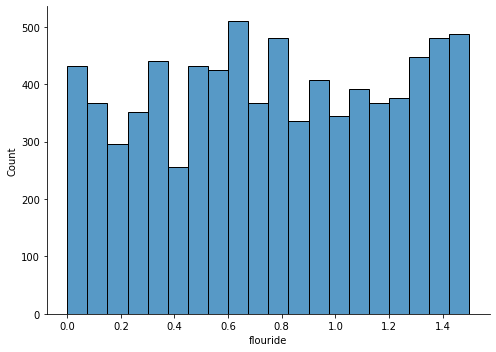

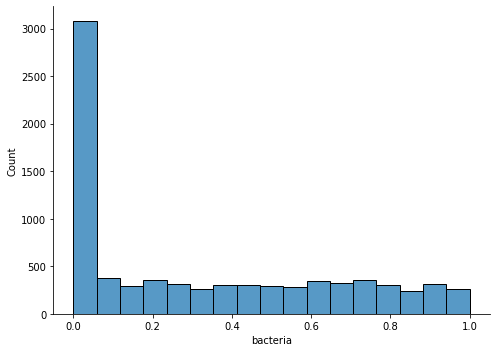

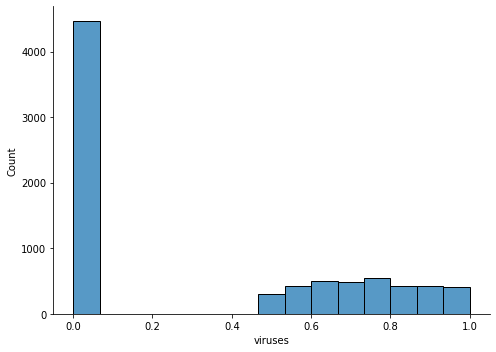

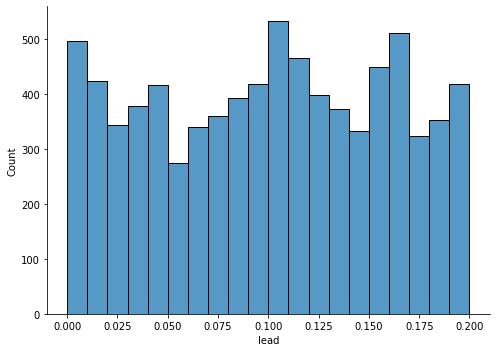

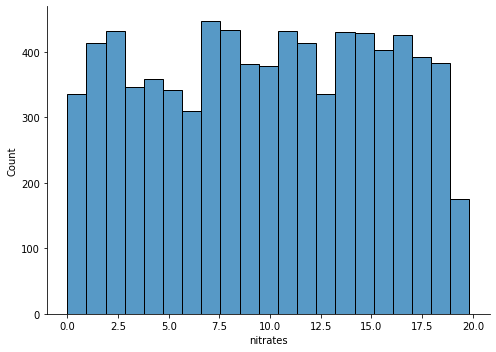

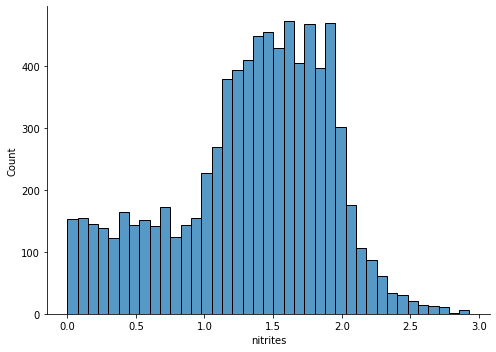

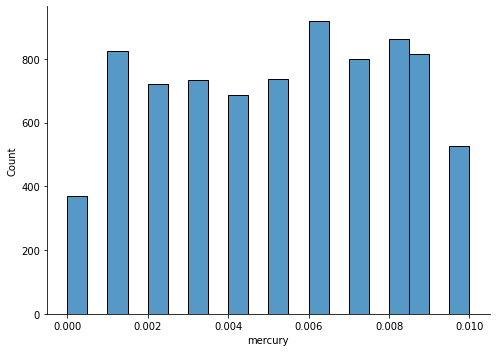

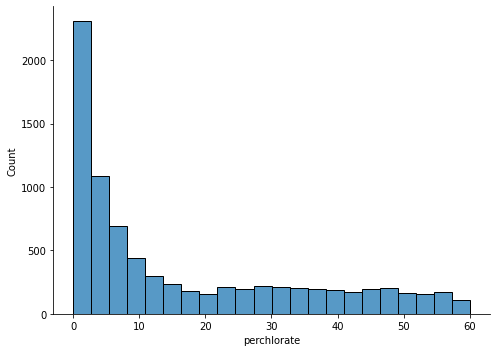

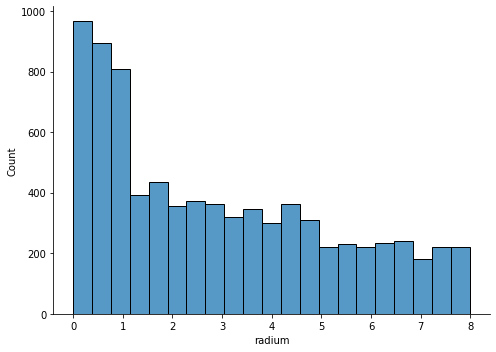

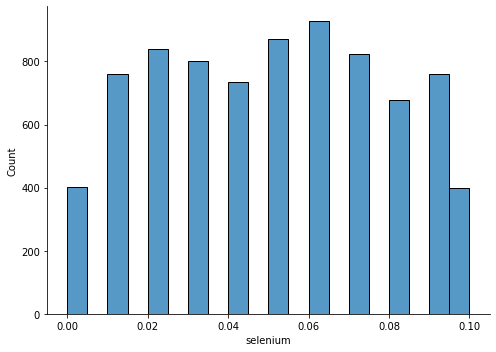

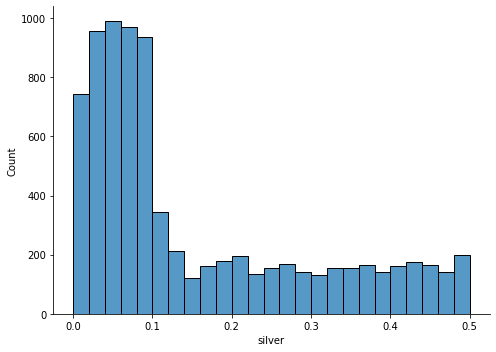

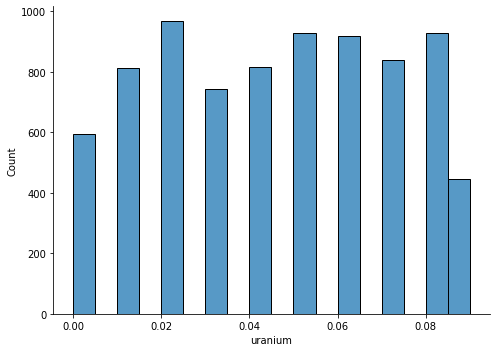

In [105]:
#to see how is the dataset distributed 
cols_list = list(df.columns)
cols_list.remove('is_safe')
for column in cols_list:
  sns.displot(
  data=df,
  x=column,
  kind="hist",
  aspect=1.4
)

In [106]:
#to see the correlations between the features 
correlation_df = df.corr(method='pearson')
print(correlation_df)

             aluminium   ammonia   arsenic    barium   cadmium  chloramine  \
aluminium     1.000000  0.067638  0.225773  0.294145 -0.099911    0.369309   
ammonia       0.067638  1.000000  0.046970  0.070350 -0.006531    0.105189   
arsenic       0.225773  0.046970  1.000000  0.362945  0.334682    0.356559   
barium        0.294145  0.070350  0.362945  1.000000 -0.037803    0.446928   
cadmium      -0.099911 -0.006531  0.334682 -0.037803  1.000000   -0.144370   
chloramine    0.369309  0.105189  0.356559  0.446928 -0.144370    1.000000   
chromium      0.353218  0.125155  0.312475  0.415972 -0.157766    0.555938   
copper        0.168612  0.016148 -0.036444  0.065426 -0.109024    0.119059   
flouride     -0.009784 -0.027908  0.003792 -0.018548  0.004880    0.004400   
bacteria     -0.078238  0.063804  0.035688  0.101259 -0.092431    0.154510   
viruses      -0.070863  0.106320  0.011703 -0.002276  0.021183    0.003687   
lead          0.020792 -0.037562 -0.087756 -0.042888 -0.034959  

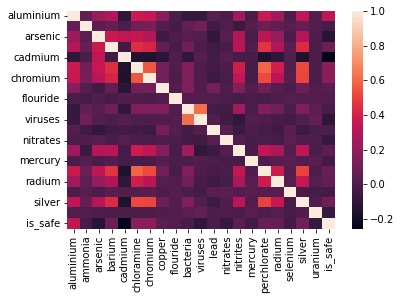

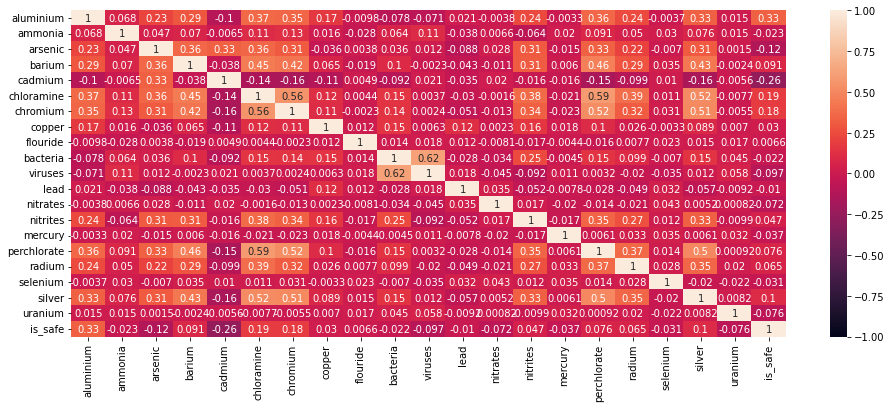

In [107]:
#Heatmap
sns.heatmap(correlation_df)
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(correlation_df, vmin=-1, vmax=1, annot=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


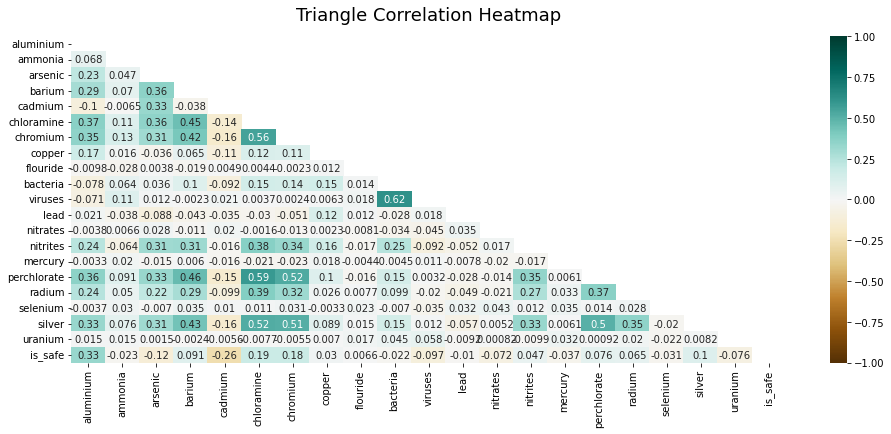

In [108]:
#Heatmap
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(correlation_df, dtype=np.bool))
heatmap = sns.heatmap(correlation_df, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

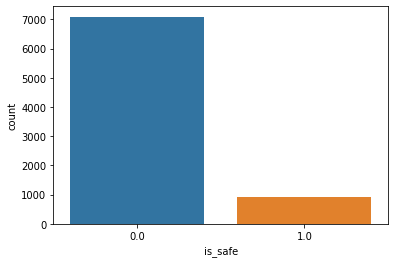

In [109]:
#Check if the data is balanced
sns.countplot(data = df, x = 'is_safe')

In [127]:
#Split the data to test and train
y=df['is_safe']
x=df.drop('is_safe',axis=1)
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.35,random_state = 25)

In [111]:
#Standardization 

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

In [112]:
#knn=3

classifier = knn(n_neighbors=3)
classifier.fit(X_train, y_train) 
y_predict = classifier.predict(X_test)
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict)) 
print('Accuracy  : ' ,'%.2f' % accuracy_score(y_test, y_predict))
print("Precision : ", '%.2f' % precision_score(y_test, y_predict, average='weighted')) 
print("Recall : ",'%.2f' % recall_score(y_test, y_predict, average='weighted')) 
print("F-measure : ",'%.2f' % f1_score(y_test, y_predict, average = 'weighted'))

[[2423   77]
 [ 179  121]]
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95      2500
         1.0       0.61      0.40      0.49       300

    accuracy                           0.91      2800
   macro avg       0.77      0.69      0.72      2800
weighted avg       0.90      0.91      0.90      2800

Accuracy  :  0.91
Precision :  0.90
Recall :  0.91
F-measure :  0.90


In [113]:
#knn=5

classifier = knn(n_neighbors=5)
classifier.fit(X_train, y_train) 
y_predict = classifier.predict(X_test)
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict)) 
print('Accuracy  : ' ,'%.2f' % accuracy_score(y_test, y_predict))
print("Precision : ", '%.2f' % precision_score(y_test, y_predict, average='weighted')) 
print("Recall : ",'%.2f' % recall_score(y_test, y_predict, average='weighted')) 
print("F-measure : ",'%.2f' % f1_score(y_test, y_predict, average = 'weighted'))

[[2442   58]
 [ 180  120]]
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95      2500
         1.0       0.67      0.40      0.50       300

    accuracy                           0.92      2800
   macro avg       0.80      0.69      0.73      2800
weighted avg       0.90      0.92      0.91      2800

Accuracy  :  0.92
Precision :  0.90
Recall :  0.92
F-measure :  0.91


In [114]:
#knn=7

classifier = knn(n_neighbors=7)
classifier.fit(X_train, y_train) 
y_predict = classifier.predict(X_test)
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict)) 
print('Accuracy  : ' ,'%.2f' % accuracy_score(y_test, y_predict))
print("Precision : ", '%.2f' % precision_score(y_test, y_predict, average='weighted')) 
print("Recall : ",'%.2f' % recall_score(y_test, y_predict, average='weighted')) 
print("F-measure : ",'%.2f' % f1_score(y_test, y_predict, average = 'weighted'))

[[2458   42]
 [ 195  105]]
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95      2500
         1.0       0.71      0.35      0.47       300

    accuracy                           0.92      2800
   macro avg       0.82      0.67      0.71      2800
weighted avg       0.90      0.92      0.90      2800

Accuracy  :  0.92
Precision :  0.90
Recall :  0.92
F-measure :  0.90


In [115]:
#Naive bayes

nb=GaussianNB()
nb.fit(X_train,y_train)
y_predict=nb.predict(X_test)
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict)) 
print('Accuracy  : ' ,'%.2f' % accuracy_score(y_test, y_predict))
print("Precision : ", '%.2f' % precision_score(y_test, y_predict, average='weighted')) 
print("Recall : ",'%.2f' % recall_score(y_test, y_predict, average='weighted')) 
print("F-measure : ",'%.2f' % f1_score(y_test, y_predict, average = 'weighted'))

[[2195  305]
 [ 119  181]]
              precision    recall  f1-score   support

         0.0       0.95      0.88      0.91      2500
         1.0       0.37      0.60      0.46       300

    accuracy                           0.85      2800
   macro avg       0.66      0.74      0.69      2800
weighted avg       0.89      0.85      0.86      2800

Accuracy  :  0.85
Precision :  0.89
Recall :  0.85
F-measure :  0.86


In [116]:
#Neural Network with 3 hidden layers and 3 hidden nodes

nn = MLPClassifier(hidden_layer_sizes=(3, 3))
nn.fit(X_train,y_train)
y_predict=nn.predict(X_test)
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict)) 
print('Accuracy  : ' ,'%.2f' % accuracy_score(y_test, y_predict))
print("Precision : ", '%.2f' % precision_score(y_test, y_predict, average='weighted')) 
print("Recall : ",'%.2f' % recall_score(y_test, y_predict, average='weighted')) 
print("F-measure : ",'%.2f' % f1_score(y_test, y_predict, average = 'weighted'))

[[2439   61]
 [ 116  184]]
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96      2500
         1.0       0.75      0.61      0.68       300

    accuracy                           0.94      2800
   macro avg       0.85      0.79      0.82      2800
weighted avg       0.93      0.94      0.93      2800

Accuracy  :  0.94
Precision :  0.93
Recall :  0.94
F-measure :  0.93


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [117]:
#Neural Network with 5 hidden layers and 5 hidden nodes

nn = MLPClassifier(hidden_layer_sizes=(5, 5))
nn.fit(X_train,y_train)
y_predict=nn.predict(X_test)
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict)) 
print('Accuracy  : ' ,'%.2f' % accuracy_score(y_test, y_predict))
print("Precision : ", '%.2f' % precision_score(y_test, y_predict, average='weighted')) 
print("Recall : ",'%.2f' % recall_score(y_test, y_predict, average='weighted')) 
print("F-measure : ",'%.2f' % f1_score(y_test, y_predict, average = 'weighted'))

[[2470   30]
 [  98  202]]
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      2500
         1.0       0.87      0.67      0.76       300

    accuracy                           0.95      2800
   macro avg       0.92      0.83      0.87      2800
weighted avg       0.95      0.95      0.95      2800

Accuracy  :  0.95
Precision :  0.95
Recall :  0.95
F-measure :  0.95


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [118]:
#Neural Network with 7 hidden layers and 7 hidden nodes

nn = MLPClassifier(hidden_layer_sizes=(7, 7))
nn.fit(X_train,y_train)
y_predict=nn.predict(X_test)
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict)) 
print('Accuracy  : ' ,'%.2f' % accuracy_score(y_test, y_predict))
print("Precision : ", '%.2f' % precision_score(y_test, y_predict, average='weighted')) 
print("Recall : ",'%.2f' % recall_score(y_test, y_predict, average='weighted')) 
print("F-measure : ",'%.2f' % f1_score(y_test, y_predict, average = 'weighted'))

[[2440   60]
 [  90  210]]
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      2500
         1.0       0.78      0.70      0.74       300

    accuracy                           0.95      2800
   macro avg       0.87      0.84      0.85      2800
weighted avg       0.94      0.95      0.95      2800

Accuracy  :  0.95
Precision :  0.94
Recall :  0.95
F-measure :  0.95


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [119]:
#Decision Tree

dt=DecisionTreeClassifier() 
dt.fit(X_train,y_train)
y_predict=dt.predict(X_test)
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict)) 
print('Accuracy  : ' ,'%.2f' % accuracy_score(y_test, y_predict))
print("Precision : ", '%.2f' % precision_score(y_test, y_predict, average='weighted')) 
print("Recall : ",'%.2f' % recall_score(y_test, y_predict, average='weighted')) 
print("F-measure : ",'%.2f' % f1_score(y_test, y_predict, average = 'weighted'))

[[2451   49]
 [  58  242]]
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      2500
         1.0       0.83      0.81      0.82       300

    accuracy                           0.96      2800
   macro avg       0.90      0.89      0.90      2800
weighted avg       0.96      0.96      0.96      2800

Accuracy  :  0.96
Precision :  0.96
Recall :  0.96
F-measure :  0.96


In [120]:
#Decision tree with max leaf nodes = 5

dt=DecisionTreeClassifier(max_leaf_nodes=5)   
dt.fit(X_train,y_train)
y_predict=dt.predict(X_test)
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict)) 
print('Accuracy  : ' ,'%.2f' % accuracy_score(y_test, y_predict))
print("Precision : ", '%.2f' % precision_score(y_test, y_predict, average='weighted')) 
print("Recall : ",'%.2f' % recall_score(y_test, y_predict, average='weighted')) 
print("F-measure : ",'%.2f' % f1_score(y_test, y_predict, average = 'weighted'))

[[2453   47]
 [ 110  190]]
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      2500
         1.0       0.80      0.63      0.71       300

    accuracy                           0.94      2800
   macro avg       0.88      0.81      0.84      2800
weighted avg       0.94      0.94      0.94      2800

Accuracy  :  0.94
Precision :  0.94
Recall :  0.94
F-measure :  0.94


In [121]:
#Decision tree with max depth = 7

dt=DecisionTreeClassifier(max_depth=7)   
dt.fit(X_train,y_train)
y_predict=dt.predict(X_test)
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict)) 
print('Accuracy  : ' ,'%.2f' % accuracy_score(y_test, y_predict))
print("Precision : ", '%.2f' % precision_score(y_test, y_predict, average='weighted')) 
print("Recall : ",'%.2f' % recall_score(y_test, y_predict, average='weighted')) 
print("F-measure : ",'%.2f' % f1_score(y_test, y_predict, average = 'weighted'))

[[2467   33]
 [  69  231]]
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      2500
         1.0       0.88      0.77      0.82       300

    accuracy                           0.96      2800
   macro avg       0.92      0.88      0.90      2800
weighted avg       0.96      0.96      0.96      2800

Accuracy  :  0.96
Precision :  0.96
Recall :  0.96
F-measure :  0.96


In [122]:
#SVM with Gaussian Kernel

clf = svm.SVC(kernel='rbf')
clf.fit(X_train,y_train)
y_predict = clf.predict(X_test)
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict)) 
print('Accuracy  : ' ,'%.2f' % accuracy_score(y_test, y_predict))
print("Precision : ", '%.2f' % precision_score(y_test, y_predict, average='weighted')) 
print("Recall : ",'%.2f' % recall_score(y_test, y_predict, average='weighted')) 
print("F-measure : ",'%.2f' % f1_score(y_test, y_predict, average = 'weighted'))

[[2477   23]
 [ 140  160]]
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      2500
         1.0       0.87      0.53      0.66       300

    accuracy                           0.94      2800
   macro avg       0.91      0.76      0.82      2800
weighted avg       0.94      0.94      0.94      2800

Accuracy  :  0.94
Precision :  0.94
Recall :  0.94
F-measure :  0.94


In [123]:
#Svm with polynomial kernel

clf = svm.SVC(kernel='poly')
clf.fit(X_train,y_train)
y_predict = clf.predict(X_test)
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict)) 
print('Accuracy  : ' ,'%.2f' % accuracy_score(y_test, y_predict))
print("Precision : ", '%.2f' % precision_score(y_test, y_predict, average='weighted')) 
print("Recall : ",'%.2f' % recall_score(y_test, y_predict, average='weighted')) 
print("F-measure : ",'%.2f' % f1_score(y_test, y_predict, average = 'weighted'))

[[2473   27]
 [ 166  134]]
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96      2500
         1.0       0.83      0.45      0.58       300

    accuracy                           0.93      2800
   macro avg       0.88      0.72      0.77      2800
weighted avg       0.93      0.93      0.92      2800

Accuracy  :  0.93
Precision :  0.93
Recall :  0.93
F-measure :  0.92


In [124]:
#SVM with Sigmoid Kernel

clf = svm.SVC(kernel='sigmoid')
clf.fit(X_train,y_train)
y_predict = clf.predict(X_test)
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict)) 
print('Accuracy  : ' ,'%.2f' % accuracy_score(y_test, y_predict))
print("Precision : ", '%.2f' % precision_score(y_test, y_predict, average='weighted')) 
print("Recall : ",'%.2f' % recall_score(y_test, y_predict, average='weighted')) 
print("F-measure : ",'%.2f' % f1_score(y_test, y_predict, average = 'weighted'))

[[2347  153]
 [ 244   56]]
              precision    recall  f1-score   support

         0.0       0.91      0.94      0.92      2500
         1.0       0.27      0.19      0.22       300

    accuracy                           0.86      2800
   macro avg       0.59      0.56      0.57      2800
weighted avg       0.84      0.86      0.85      2800

Accuracy  :  0.86
Precision :  0.84
Recall :  0.86
F-measure :  0.85


In [125]:
#Random Forest 

regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train, y_train)
y_predict=regressor.predict(X_test)
print(classification_report(y_test,np.round(abs(y_predict))) )
print('Accuracy : ' ,'%.2f' % accuracy_score(y_test, np.round(abs(y_predict))))
print("Precision : ", '%.2f' % precision_score(y_test, np.round(abs(y_predict)), average='weighted')) 
print("Recall : ", '%.2f' % recall_score(y_test, np.round(abs(y_predict)), average='weighted')) 
print("F-measure : ",'%.2f' % f1_score(y_test, np.round(abs(y_predict)), average = 'weighted')) 

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      2500
         1.0       0.91      0.78      0.84       300

    accuracy                           0.97      2800
   macro avg       0.94      0.88      0.91      2800
weighted avg       0.97      0.97      0.97      2800

Accuracy :  0.97
Precision :  0.97
Recall :  0.97
F-measure :  0.97


In [126]:
#clustering using K-means (n=3)

#model = KMeans(n_clusters=3)
#model.fit(X_train,X_test)
#y_predict=model.predict(X_test)
#print(confusion_matrix(y_test, y_predict))
#print(classification_report(y_test, y_predict)) 
#print('Accuracy  : ' ,'%.2f' % accuracy_score(y_test, y_predict))
#print("Precision : ", '%.2f' % precision_score(y_test, y_predict, average='weighted')) 
#print("Recall : ",'%.2f' % recall_score(y_test, y_predict, average='weighted')) 
#print("F-measure : ",'%.2f' % f1_score(y_test, y_predict, average = 'weighted'))
# we tried clustering using k-means but we got a very low accuracy so we decided to take it out